In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/women-entrepreneurship-and-labor-force/Dataset3.csv


In [2]:
data=pd.read_csv("../input/women-entrepreneurship-and-labor-force/Dataset3.csv",sep=';')
data.style.background_gradient(cmap='YlGnBu', low=0, high=0, axis=0, subset=None)

,No,Country,Level of development,European Union Membership,Currency,Women Entrepreneurship Index,Entrepreneurship Index,Inflation rate,Female Labor Force Participation Rate
0,4,Austria,Developed,Member,Euro,54.900000,64.900000,0.900000,67.100000
1,6,Belgium,Developed,Member,Euro,63.600000,65.500000,0.600000,58.000000
2,17,Estonia,Developed,Member,Euro,55.400000,60.200000,-0.880000,68.500000
3,18,Finland,Developed,Member,Euro,66.400000,65.700000,-0.200000,67.700000
4,19,France,Developed,Member,Euro,68.800000,67.300000,0.000000,60.600000
5,20,Germany,Developed,Member,Euro,63.600000,67.400000,0.500000,69.900000
6,22,Greece,Developed,Member,Euro,43.000000,42.000000,-1.700000,42.500000
7,28,Ireland,Developed,Member,Euro,64.300000,65.300000,-0.300000,59.400000
8,30,Italy,Developed,Member,Euro,51.400000,41.300000,0.000000,47.200000
9,34,Latvia,Developed,Member,Euro,56.600000,54.500000,0.200000,66.400000


******The Global Entrepreneurship Index (GEI)** is an economic activity index compiled by US-based The Global Entrepreneurship and Development Institute, which looks at how individual countries across the world allocate resources to promoting entrepreneurship, if indeed they do.
The Global Entrepreneurship Index is a composite indicator of the health of the entrepreneurship ecosystem in a given country.The GEI measures both the quality of entrepreneurship and the extent and depth of the supporting entrepreneurial ecosystem.

**Women entrepreneurs** may be defined as the women or a group of women who initiate, organise and operate a business enterprise. Women are expected to innovate, imitate or adopt an economic activity to be called women entrepreneurs.

**Why does entrepreneurship matter? How do entrepreneurs contribute?**


Entrepreneurs improve economies and people’s lives by creating jobs, developing new solutions to problems, creating technology that improves efficiency, and exchanging ideas globally. Many of the conditions that help entrepreneurs also help the economy as a whole, providing even broader gains from supporting entrepreneurship. 


![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQRPT84yt85J9Bji1J8x3Bcwj8Oin_FuDJZnQ&usqp=CAU)

In [3]:
data.shape

(51, 9)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 9 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   No                                     51 non-null     int64  
 1   Country                                51 non-null     object 
 2   Level of development                   51 non-null     object 
 3   European Union Membership              51 non-null     object 
 4   Currency                               51 non-null     object 
 5   Women Entrepreneurship Index           51 non-null     float64
 6   Entrepreneurship Index                 51 non-null     float64
 7   Inflation rate                         51 non-null     float64
 8   Female Labor Force Participation Rate  51 non-null     float64
dtypes: float64(4), int64(1), object(4)
memory usage: 3.7+ KB


In [5]:
data.isnull().sum()

No                                       0
Country                                  0
Level of development                     0
European Union Membership                0
Currency                                 0
Women Entrepreneurship Index             0
Entrepreneurship Index                   0
Inflation rate                           0
Female Labor Force Participation Rate    0
dtype: int64

In [6]:
data_copy=data.copy()

In [7]:
category=[]
for col in data_copy.columns:
    if data[col].dtypes==object:
        category.append(col)

In [8]:
data_encode=pd.get_dummies(data_copy,category,dtype=np.uint8)

In [9]:
data_encode.head()

,No,Women Entrepreneurship Index,Entrepreneurship Index,Inflation rate,Female Labor Force Participation Rate,Country_Algeria,Country_Argentina,Country_Australia,Country_Austria,Country_Belgium,...,Country_Thailand,Country_Tunisia,Country_Turkey,Country_Uruguay,Level of development_Developed,Level of development_Developing,European Union Membership_Member,European Union Membership_Not Member,Currency_Euro,Currency_National Currency
0,4,54.9,64.9,0.90,67.1,0,0,0,1,0,...,0,0,0,0,1,0,1,0,1,0
1,6,63.6,65.5,0.60,58.0,0,0,0,0,1,...,0,0,0,0,1,0,1,0,1,0
2,17,55.4,60.2,-0.88,68.5,0,0,0,0,0,...,0,0,0,0,1,0,1,0,1,0
3,18,66.4,65.7,-0.20,67.7,0,0,0,0,0,...,0,0,0,0,1,0,1,0,1,0
4,19,68.8,67.3,0.00,60.6,0,0,0,0,0,...,0,0,0,0,1,0,1,0,1,0


In [10]:

from scipy.stats import shapiro

stat, p = shapiro(data_encode)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

stat=0.270, p=0.000
Probably not Gaussian


In [11]:
data.describe()

,No,Women Entrepreneurship Index,Entrepreneurship Index,Inflation rate,Female Labor Force Participation Rate
count,51.000000,51.000000,51.000000,51.000000,51.000000
mean,29.980392,47.835294,47.241176,2.587647,58.481765
std,18.017203,14.268480,16.193149,5.380639,13.864567
min,1.000000,25.300000,24.800000,-2.250000,13.000000
25%,14.500000,36.350000,31.900000,-0.500000,55.800000
50%,30.000000,44.500000,42.700000,0.600000,61.000000
75%,45.500000,59.150000,65.400000,3.600000,67.400000
max,60.000000,74.800000,77.600000,26.500000,82.300000


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

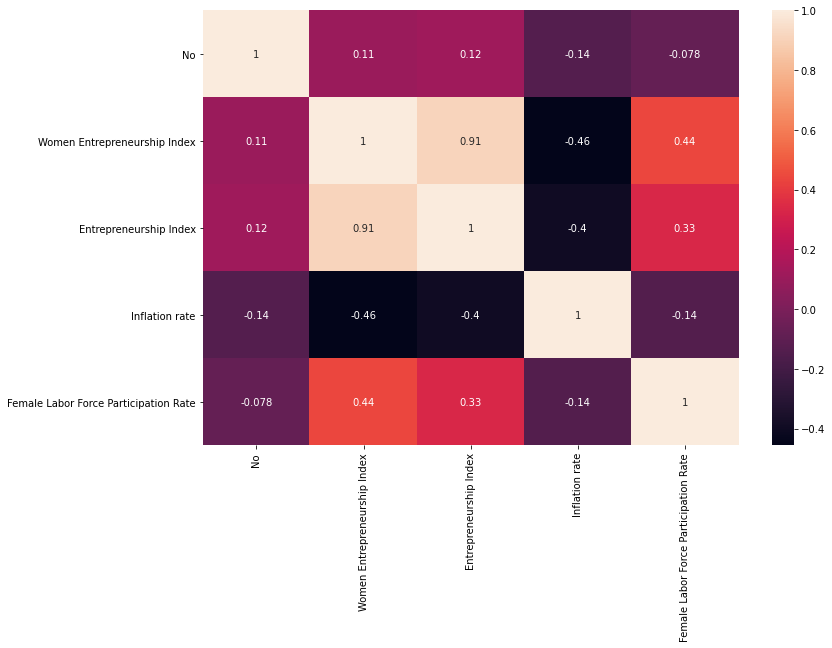

In [13]:
fig,ax=plt.subplots(figsize=(12,8))
sns.heatmap(data.corr(),annot=True)
plt.show()

It's observed that enterpreneurship index and women enterpreneurship index are strongly correlated as well as positively correlated.Also Female Labor Force Participation Rate and Women enterpreneurship is positively correlated.As expected inflation rate is negatively correlated with both enterpreneurship index as well as women enterpreneurship index.

In [14]:
data['Country'].nunique()

51

In [15]:
data['Level of development'].value_counts()

Developed     27
Developing    24
Name: Level of development, dtype: int64

In [16]:
fig = px.bar(data,
        x = "Level of development",
        y = "Women Entrepreneurship Index",
        color_discrete_sequence=["magenta"]
        
    )
    
fig.show()

In [17]:
fig = px.bar(data,
        x = "European Union Membership",
        y = "Women Entrepreneurship Index",
        color_discrete_sequence=["red"]
        
    )
    
fig.show()

In [18]:
import plotly.graph_objects as go
country_fig = go.Figure(data=[go.Pie(labels=data['Country'],
                             values=data['Women Entrepreneurship Index'],
                             hole=.7,
                             title = 'Count by Country',
                             marker_colors = px.colors.sequential.Greens_r,
                            )
                     ])
country_fig.update_layout(title = 'Women Enterpreneurship Index % by Country')
country_fig.show()


Australia has highest percentage of women enterpreneurship index.


India has lowest percentage of women enterpreneurship index.

In [19]:
import plotly.express as px

fig = px.scatter(data, x="Female Labor Force Participation Rate", y="Women Entrepreneurship Index", color="Level of development",
                 size='Entrepreneurship Index', hover_data=['European Union Membership'])
fig.show()

In [20]:
fig = px.scatter(
    data, x='Inflation rate', y='Women Entrepreneurship Index', opacity=0.65,
    trendline='ols', trendline_color_override='darkblue'
)
fig.show()

In [21]:
fig = px.violin(data, y="Women Entrepreneurship Index", x="Currency", color="Level of development", box=True, points="all",
          hover_data=data.columns)
fig.show()

Are European Union membership variable and development variable independent from each other?

Null Hypothesis-European Union membership variable and development variable are independent from each other.


Alternate Hypothesis-European Union membership variable and development variable are not  independent from each other.

In [22]:
crosstab = pd.crosstab(data['European Union Membership'], data['Level of development'])

crosstab.style.background_gradient(cmap='YlGnBu', low=0, high=0, axis=0, subset=None)

Level of development,Developed,Developing
European Union Membership,,
Member,20,0
Not Member,7,24


In [23]:
from scipy import stats

In [24]:
stats.chi2_contingency(crosstab)

(26.222328629032262,
 3.042837837948524e-07,
 1,
 array([[10.58823529,  9.41176471],
        [16.41176471, 14.58823529]]))

The first value (26.222328629032262) is the Chi-square value, followed by the p-value (3.042837837948524e-07), then comes the degrees of freedom (1), and lastly it outputs the expected frequencies as an array.

![](https://www.mun.ca/biology/scarr/IntroPopGen-Table-D-01-smc.jpg)

since for degree 1 and chi square value 26.222328629032262 we get probability less than 0.01 i.e less than alpha or level of significance(0.05) so we reject the null hypothesis.And Hence it is proved that
European Union membership variable and development variable are not independent from each other.

Do the Women Entrepreneurship Index and Global Entrepreneurship Index values show a statistically significant difference between the countries that are members of the European Union and not? (Method Mann-Whitney U)

H0-Women Entrepreneurship Index and Global Entrepreneurship Index values show a statistically significant difference between the countries that are members of the European Union and not.



Ha-Women Entrepreneurship Index and Global Entrepreneurship Index values do not show a statistically significant difference between the countries that are members of the European Union and not.

In [25]:
data_eu=data[data['European Union Membership']=='Member']
data_not_eu=data[data['European Union Membership']=='Not Member']

In [26]:
def mann_whitney_u_test(distribution_1, distribution_2):
    """
    Perform the Mann-Whitney U Test, comparing two different distributions.
    Args:
       distribution_1: List. 
       distribution_2: List.
    Outputs:
        u_statistic: Float. U statisitic for the test.
        p_value: Float.
    """
    u_statistic, p_value = stats.mannwhitneyu(distribution_1, distribution_2)
    return u_statistic, p_value


#### MAIN FUNCTION ####
#Perform the Mann-Whitney U Test on the two distributions
mann_whitney_u_test(list(data_eu['Women Entrepreneurship Index']), list(data_not_eu['Women Entrepreneurship Index']))


(84.0, 6.788175847129778e-06)

since p-value<0.05 ,so H0 is rejected.Hence,it is proved that Women Entrepreneurship Index and Global Entrepreneurship Index values do not show a statistically significant difference between the countries that are members of the European Union and not

In [27]:
mann_whitney_u_test(list(data_eu['Entrepreneurship Index']), list(data_not_eu['Entrepreneurship Index']))

(130.0, 0.00026689859185162853)

Is there a statistically significant relationship between Women's Entrepreneurship Index and Global Entrepreneurship Index values? 

In [28]:
data[['Women Entrepreneurship Index','Entrepreneurship Index']].corr(method='spearman').iloc[0,1]

0.9077539201816731

There  is a statistically significant relationship between Women's Entrepreneurship Index and Global Entrepreneurship Index values.

# **If You Liked It Please Upvote!!**

<img src="https://media.tenor.com/images/716f637338be29904408274b45c6dabd/tenor.gif">